## Fundamentals Of Data Science
Regression Modelling & Clustering Analysis

In [101]:
# Import Relevant Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Binary classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix,
classification_report, ConfusionMatrixDisplay )

# Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


# Neural network libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MSE
import tensorflow.keras as tf

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

LOAD DATASET

In [68]:
# Load Dataset
data= pd.read_csv('Streaming.csv')
# View Data
streaming_data= data.copy()
streaming_data.head(4)

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1


Data Cleaning Steps

In [69]:
# Assign median Age to missing values in Age columns
streaming_data['Age']= streaming_data['Age'].fillna(streaming_data['Age'].median())
streaming_data['Age']=streaming_data['Age'].astype(int) # Convert age to interger

# Assign Satisfaction_Score mean to missing values in Satisfaction_Score columns
streaming_data['Satisfaction_Score']= streaming_data['Satisfaction_Score'].fillna(streaming_data['Satisfaction_Score'].mean())

# For uniformity, round enties in Satisfaction_Score to 1 decimal point
streaming_data['Satisfaction_Score']=streaming_data['Satisfaction_Score'].apply(lambda x: round(x,1))

In [70]:
streaming_data.isna().sum() # List of NaN in each column

Customer_ID               0
Age                       0
Gender                    0
Subscription_Length       0
Region                    0
Payment_Method            0
Support_Tickets_Raised    0
Satisfaction_Score        0
Discount_Offered          0
Last_Activity             0
Monthly_Spend             0
Churned                   0
dtype: int64

### TASK 1a

Compare regression models that predict "Monthly Spend" based on a single numerical input 
feature. Based on your results, which numerical variable in the dataset is the best predictor of 
Monthly Spend and why? For each numerical input feature, does Monthly Spend fit better with 
a linear model or a non-linear model (e.g., polynomial regress-t (a)? 

In [6]:
# Assign Dependent and Numerical Independent variables

x= streaming_data[['Age', 'Subscription_Length',
       'Support_Tickets_Raised', 'Satisfaction_Score',
       'Discount_Offered', 'Last_Activity',]]
y= streaming_data['Monthly_Spend']

# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()
scale.fit(x)
# Scale dataset
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


Simple Linear Regression of Age predicting Monthly spending

In [7]:
# Create a regression model
model= LinearRegression()
# Fit model to data
model.fit(x_train_scaled[:,0].reshape(-1,1), y_train) # Extract Age column from x_train_scaled & above & reshape to 2D

# Print coefficient and intercept
print("GDP coefficient: ", model.coef_[0]) 
print("intercept: ", model.intercept_)

# Predict y
y_pred = model.predict(x_test_scaled[:,0].reshape(-1,1)) # Fetch Age column from x_train_scaled & above & reshape to 2D

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, y_pred)

# Root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, y_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

GDP coefficient:  0.00016010131370266243
intercept:  46.562889083983265
Mean absolute error:  7.64133598804999
Mean squared error:  90.4813712947175
Root mean squared error:  9.51216964181766
R2:  -0.0008940218086892493


Simple Linear Regression of Subscription_Length predicting Monthly spending

In [8]:
# Create a regression model
model= LinearRegression()
# Fit model to data
model.fit(x_train_scaled[:,1].reshape(-1,1), y_train) # Fetch Subscription length column from x_train_scaled above & reshape to 2D

# Print coefficient and intercept
print("GDP coefficient: ", model.coef_[0]) 
print("intercept: ", model.intercept_)

# Predict y
y_pred = model.predict(x_test_scaled[:,1].reshape(-1,1)) # Fetch Subscription length column from x_train_scaled above & reshape to 2D

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, y_pred)

# Root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, y_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

GDP coefficient:  5.263237406525985
intercept:  46.62676397417948
Mean absolute error:  6.642846985599881
Mean squared error:  64.8278293332412
Root mean squared error:  8.051573096807928
R2:  0.28288236685617885


Simple Linear Regression of Support Ticket predicting Monthly spending

In [9]:
# Create a regression model
model= LinearRegression()
# Fit model to data
model.fit(x_train_scaled[:,2].reshape(-1,1), y_train) # Fetch Support Ticket Raised column from x_train_scaled above & reshape to 2D

# Print coefficient and intercept
print("GDP coefficient: ", model.coef_[0]) 
print("intercept: ", model.intercept_)

# Predict y
y_pred = model.predict(x_test_scaled[:,2].reshape(-1,1)) # Fetch Support Ticket Raised column from x_train_scaled above & reshape to 2D

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, y_pred)

# Root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, y_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

GDP coefficient:  -1.5775950093188336
intercept:  46.56178078502687
Mean absolute error:  7.600180742380477
Mean squared error:  88.79502699716902
Root mean squared error:  9.423111322549948
R2:  0.01776011552340051


Simple Linear Regression of Satisfaction_Score predicting Monthly spending

In [10]:
# Create a regression model
model= LinearRegression()
# Fit model to data
model.fit(x_train_scaled[:,3].reshape(-1,1), y_train) # Fetch Satisfaction_Score column from x_train_scaled above & reshape to 2D

# Print coefficient and intercept
print("GDP coefficient: ", model.coef_[0]) 
print("intercept: ", model.intercept_)

# Predict y
y_pred = model.predict(x_test_scaled[:,3].reshape(-1,1)) # Fetch Satisfaction_Score column from x_train_scaled above & reshape to 2D

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, y_pred)

# Root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, y_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

GDP coefficient:  6.872667057142374
intercept:  46.556324835018025
Mean absolute error:  5.175464793732153
Mean squared error:  42.24441246774364
Root mean squared error:  6.499570175614973
R2:  0.5326974018103372


Simple Linear Regression of Discount_Offered predicting Monthly spending

In [11]:
# Create a regression model
model= LinearRegression()
# Fit model to data
model.fit(x_train_scaled[:,4].reshape(-1,1), y_train) # Fetch Satisfaction_Score column from x_train_scaled above & reshape to 2D

# Print coefficient and intercept
print("GDP coefficient: ", model.coef_[0]) 
print("intercept: ", model.intercept_)

# Predict y
y_pred = model.predict(x_test_scaled[:,4].reshape(-1,1)) # Fetch Satisfaction_Score column from x_train_scaled above & reshape to 2D

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, y_pred)

# Root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, y_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

GDP coefficient:  2.0729860128482125
intercept:  46.56108372461377
Mean absolute error:  7.421163720217704
Mean squared error:  86.36949207328912
Root mean squared error:  9.293518820839022
R2:  0.044591090455157634


Simple Linear Regression of Last_Activity predicting Monthly spending

In [12]:
# Create a regression model
model= LinearRegression()
# Fit model to data
model.fit(x_train_scaled[:,5].reshape(-1,1), y_train) # Fetch Last_Activity column from x_train_scaled above & reshape to 2D

# Print coefficient and intercept
print("GDP coefficient: ", model.coef_[0]) 
print("intercept: ", model.intercept_)

# Predict y
y_pred = model.predict(x_test_scaled[:,5].reshape(-1,1)) # Fetch Last_Activity column from x_train_scaled & reshape to 2D

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, y_pred)

# Root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, y_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

GDP coefficient:  -0.015436419668541188
intercept:  46.56275772223133
Mean absolute error:  7.641969958058715
Mean squared error:  90.4909063749671
Root mean squared error:  9.51267083289268
R2:  -0.0009994977169642816


Scattered Plots showing the realtionship between each predictors and Monthly Spend

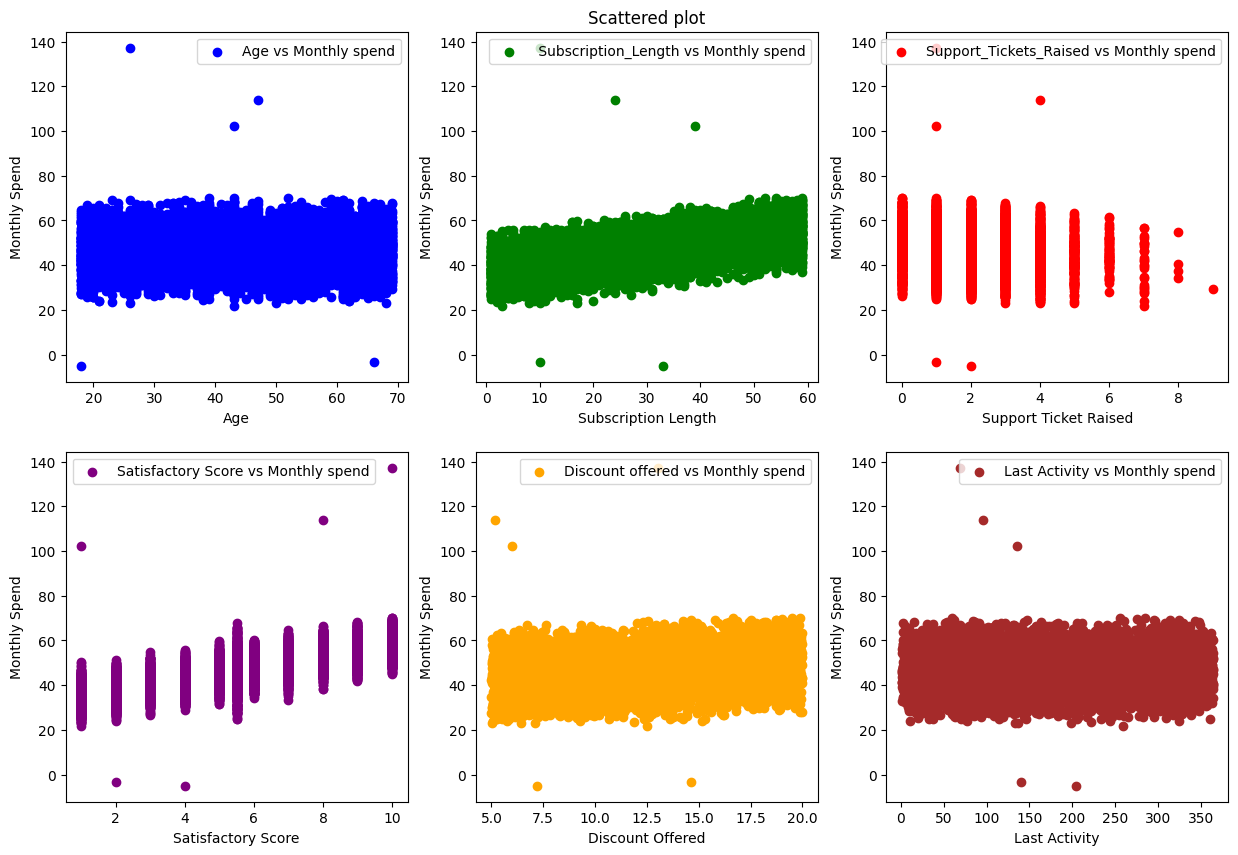

In [10]:
# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Visualise scattered plot of Age and Monthly Spend
axes[0, 0].scatter(y=streaming_data['Monthly_Spend'], x=streaming_data['Age'], label="Age vs Monthly spend", color="b")
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Monthly Spend')
axes[0, 0].legend()
# Visualise scattered plot of Subscription Length and Monthly Spend
axes[0, 1].scatter(x=streaming_data['Subscription_Length'], y=streaming_data['Monthly_Spend'], label=" Subscription_Length vs Monthly spend", color="g")
axes[0, 1].set_title("Scattered plot")
axes[0, 1].set_xlabel('Subscription Length')
axes[0, 1].set_ylabel('Monthly Spend')
axes[0, 1].legend()
# Visualise scattered plot of Supported Ticket raised and Monthly Spend
axes[0, 2].scatter(x=streaming_data['Support_Tickets_Raised'], y=streaming_data['Monthly_Spend'], label="Support_Tickets_Raised vs Monthly spend", color="r")
axes[0, 2].set_xlabel('Support Ticket Raised')
axes[0, 2].set_ylabel('Monthly Spend')
axes[0, 2].legend()
# Visualise scattered plot of Satisfactory Score and Monthly Spend
axes[1, 0].scatter(x=streaming_data['Satisfaction_Score'], y=streaming_data['Monthly_Spend'], label="Satisfactory Score vs Monthly spend", color="purple")
axes[1, 0].set_xlabel('Satisfactory Score')
axes[1, 0].set_ylabel('Monthly Spend')
axes[1, 0].legend()
# Visualise scattered plot of Discount offered and Monthly Spend
axes[1, 1].scatter(x=streaming_data['Discount_Offered'], y=streaming_data['Monthly_Spend'], label="Discount offered vs Monthly spend", color="orange")
axes[1, 1].set_xlabel('Discount Offered')
axes[1, 1].set_ylabel('Monthly Spend')
axes[1, 1].legend()
# Visualise scattered plot of Last Activity and Monthly Spend
axes[1, 2].scatter(x=streaming_data['Last_Activity'], y=streaming_data['Monthly_Spend'], label="Last Activity vs Monthly spend", color="brown")
axes[1, 2].set_xlabel('Last Activity')
axes[1, 2].set_ylabel('Monthly Spend')
axes[1, 2].legend()


Create a Polynomial Regression of Age predicting Monthly spending to support the linearity claim shown above

In [15]:
degrees = [1, 2, 3, 4, 5]
poly_r2={}
for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x_train_scaled[:,0].reshape(-1,1), y_train)
    spend_pred = poly_model.predict(x_test_scaled[:,0].reshape(-1,1))
    r2 = r2_score(y_test, spend_pred)
    poly_r2[degree]= r2


print(poly_r2)  # print results 

{1: -0.0008940218086892493,
 2: -0.0007873254778816285,
 3: -0.0051569493508227815,
 4: -0.005694727846918379,
 5: -0.005689101798520335}

Polynomial Regression of Subscription_Length predicting Monthly spending

### TASK 1b

Consider regression models that take multiple numerical variables as input features to 
predict "Monthly Spend". Does including multiple features improve prediction accuracy 
compared to single-variable models from part (a)?

Multiple Linear Regression Using Numerical Data Only As Predictor

In [16]:
# Retrieve x_train_scaled, x_test_scaled, y_train & y_test from previous cell.
# Create a regression model
model= LinearRegression()
# Fit model to data
model.fit(x_train_scaled, y_train) 

# Print coefficient and intercept
print("GDP coefficient: ", model.coef_) 
print("intercept: ", model.intercept_)

# Predict y
y_pred_mult = model.predict(x_test_scaled)

# Calculate the mean absolute error
MAE_mult = mean_absolute_error(y_test, y_pred_mult)

# Calculate the mean squared error
MSE_mult = mean_squared_error(y_test, y_pred_mult)

# Root mean squared error
RMSE_mult = np.sqrt(MSE_mult)

# Calculate the R2 score
R2_mult = r2_score(y_test, y_pred_mult)

# Print the results of these metrics.
print("Mean absolute error: ", MAE_mult)
print("Mean squared error: ", MSE_mult)
print("Root mean squared error: ", RMSE_mult)
print("R2: ", R2_mult)

GDP coefficient:  [ 0.00703977  5.17048068 -1.74911718  6.82419789  2.12123956 -0.07468045]
intercept:  46.61536106259214
Mean absolute error:  1.3714404965010418
Mean squared error:  10.302395979372276
Root mean squared error:  3.209734565251818
R2:  0.8860361376213846


(20.0, 80.0)

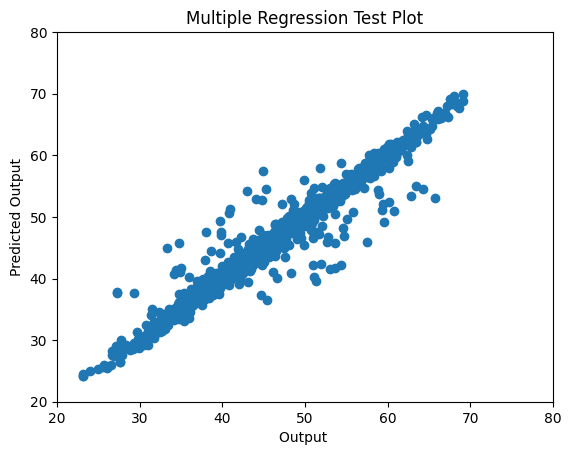

In [89]:
# Scattered plot showing relationship between predicted output and actual output
plt.scatter(y_test,y_pred_mult)
plt.xlabel('Output ')
plt.title('Multiple Regression Test Plot')
plt.ylabel('Predicted Output')
plt.xlim(20,80)
plt.ylim(20,80)

### Task 1c

(c) In parts (a) and (b), you only considered numerical variables as input. However, several 
categorical variables (e.g., Gender, Region, Payment_Method) might also affect Monthly 
Spend. Now train a regression model that uses both categorical and numerical variables (e.g., 
a Random Forest Regressor). Does this improve the model’s performance? 

Random Forest Regression Using All Data Type as Predictor

In [18]:
# Assign Predictors to Variable
x_ = streaming_data[['Age', 'Gender', 'Subscription_Length', 'Region',
       'Payment_Method', 'Support_Tickets_Raised', 'Satisfaction_Score',
       'Discount_Offered', 'Last_Activity', 'Churned']]
y_= streaming_data['Monthly_Spend']

# Convert categorical columns to dummy variables and overwrite on the same variable
x_= pd.get_dummies(x_, columns=['Gender', 'Region', 'Payment_Method'], dtype=int)

# Train-test split all variables
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.2, random_state=42)

#Create Random Forest Regression Model
randforest_model = RandomForestRegressor(random_state=42)
randforest_model.fit(x_train_, y_train_)    # Fit data in model

randforest_y_pred = randforest_model.predict(x_test_) # Predict features output

randforest_r2 = r2_score(y_test_, randforest_y_pred)  # Obtain R2

# Print Both Multiple and Random Forest Regression R2
print({'Random Forest Reg R2': randforest_r2, 'Multiple Linear Reg R2': R2_mult})
# Print MSE for Random forest and multiple Regression
print({"MSE_RandForest:": mean_squared_error(y_test_, randforest_y_pred), "MSE_MultReg:": MSE_mult})  

{'Random Forest Reg R2': 0.8820131964077758, 'Multiple Linear Reg R2': 0.8860361376213846}
{'MSE_RandForest:': 10.666072082650008, 'MSE_MultReg:': 10.302395979372276}


(20.0, 80.0)

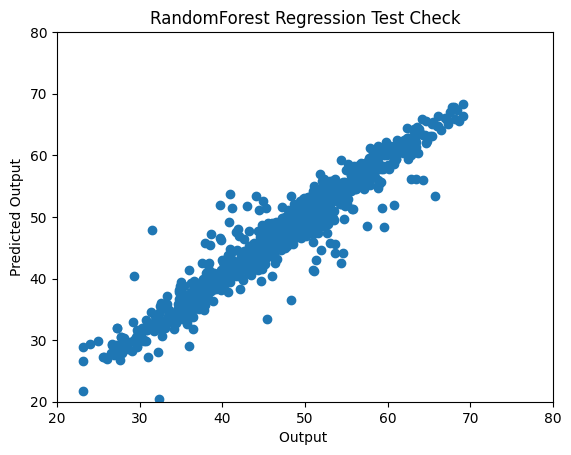

In [90]:
# Scattered plot showing relationship between predicted output and actual output
plt.scatter(y_test,randforest_y_pred)
plt.xlabel('Output ')
plt.ylabel('Predicted Output')
plt.title('RandomForest Regression Test Check')
plt.xlim(20,80)
plt.ylim(20,80)

(-20.0, 20.0)

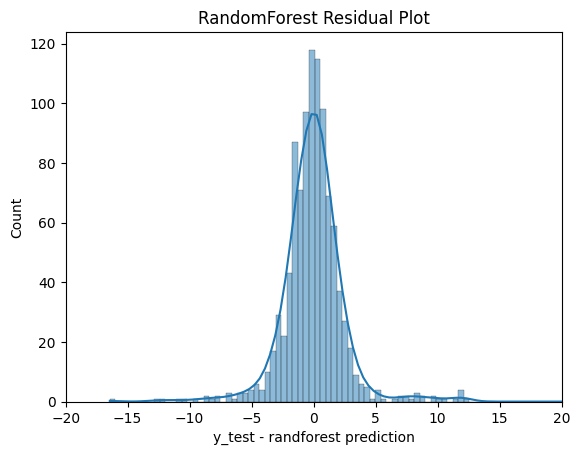

In [72]:
# Obtain the residual ubtract target and predicted to obtain pro
residual_plot=y_test-randforest_y_pred

sns.histplot(residual_plot,kde=True)
plt.xlabel('y_test - randforest prediction')
plt.title('RandomForest Residual Plot')
plt.xlim(-20,20)

### Task 1d

Develop an Artificial Neural Network (ANN) model to predict Monthly Spend based on all 
available features in the dataset. How does its performance compare to other supervised 
learning models? Discuss your neural network architecture, hyperparameter tuning, and 
optimization choices.

In [20]:
'''
from Random Forest cell above import train-test variables (x_train_, x_test_, y_train_, y_test_)
'''

# Create an instance of the StandardScaler class
scale = StandardScaler()
scale.fit(x_) # Compute the mean and std of the data

# List of numerical variable to scale
num_var= ['Age', 'Subscription_Length', 'Support_Tickets_Raised', 'Satisfaction_Score','Discount_Offered', 'Last_Activity']

# Scale numerical columns
x_train_[num_var] = scale.fit_transform(x_train_[num_var])
x_test_[num_var] = scale.fit_transform(x_test_[num_var])


In [48]:
model = Sequential() # Create an instance of sequential class
model.add(Dense(units = 1, input_dim = (16), activation = None)) # First hidden layer

model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Add Adam as optimizer
adam_optimizer = Adam(learning_rate = 0.002) 

# Compile ANN model
model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['MSE']) 

In [51]:
# Include EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 5) 

hist = model.fit(x = x_train_, y = y_train_, batch_size = None, epochs = 200,
                    verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
113/113 [==============================] - 1s 4ms/step - loss: 2200.4165 - MSE: 2200.4165 - val_loss: 2194.2976 - val_MSE: 2194.2976
Epoch 2/200
113/113 [==============================] - 0s 2ms/step - loss: 2109.3716 - MSE: 2109.3716 - val_loss: 2103.3306 - val_MSE: 2103.3306
Epoch 3/200
113/113 [==============================] - 0s 2ms/step - loss: 2021.2970 - MSE: 2021.2970 - val_loss: 2014.9613 - val_MSE: 2014.9613
Epoch 4/200
113/113 [==============================] - 0s 2ms/step - loss: 1936.0370 - MSE: 1936.0370 - val_loss: 1929.5531 - val_MSE: 1929.5531
Epoch 5/200
113/113 [==============================] - 0s 3ms/step - loss: 1853.6122 - MSE: 1853.6122 - val_loss: 1846.8008 - val_MSE: 1846.8008
Epoch 6/200
113/113 [==============================] - 0s 2ms/step - loss: 1773.6965 - MSE: 1773.6965 - val_loss: 1767.1318 - val_MSE: 1767.1318
Epoch 7/200
113/113 [==============================] - 0s 2ms/step - loss: 1696.4014 - MSE: 1696.4014 - val_loss: 1689.6262 - val_

In [52]:
# Predict y
y_pred_deep = model.predict(x_test_) 

32/32 [==============================] - 0s 4ms/step


In [27]:
# Obtain model r2
ANN_R2= r2_score(y_test_, y_pred_deep)
ANN_R2

0.8862924639753684

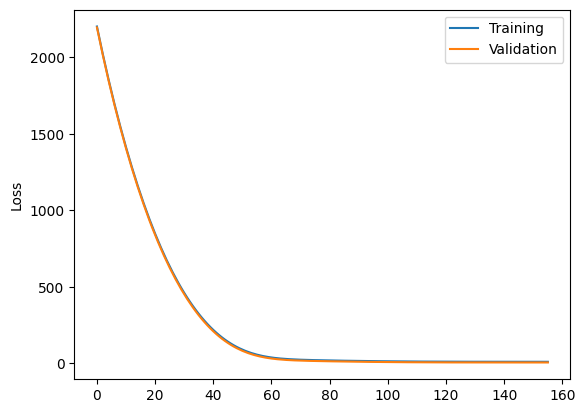

In [91]:
# Fit metrics to dataframe
hist_df = pd.DataFrame(hist.history) 

# Plot training and validation loss
plt.plot(hist_df["loss"], label = "Training")  
plt.ylabel('Loss')
plt.plot(hist_df["val_loss"], label = "Validation")
plt.legend()

(20.0, 80.0)

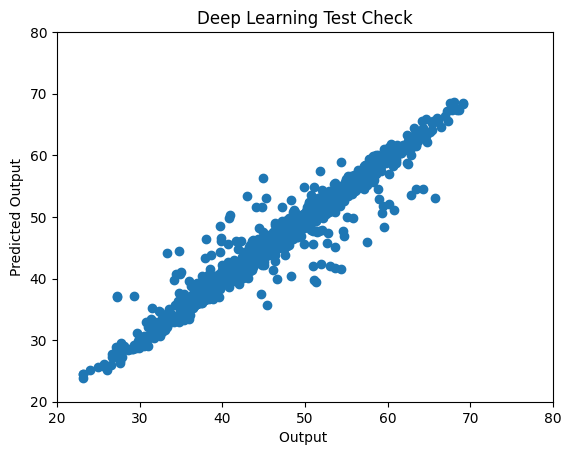

In [92]:
# Scattered plot showing relationship between predicted output and actual output
plt.scatter(y_test_,y_pred_deep)
plt.xlabel('Output ')
plt.ylabel('Predicted Output')
plt.title('Deep Learning Test Check')
plt.xlim(20,80)
plt.ylim(20,80)

### Task 1F
CLASSIFICATION MODELS

Train, evaluate and compare classification models to predict whether a customer will churn 
(1) or not churn (0) based on available features. Which model performs best, and why? Use 
appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-scoOC) to 
justify your finding answer. 

In [31]:
# Assign Predictors to Variable
x_class = streaming_data[['Age', 'Gender', 'Subscription_Length', 'Region',
       'Payment_Method', 'Support_Tickets_Raised', 'Satisfaction_Score',
       'Discount_Offered', 'Last_Activity', 'Monthly_Spend']]
y_class= streaming_data['Churned']

# Convert categorical columns to dummy variables and overwrite on the same variable
x_class= pd.get_dummies(x_class, columns=['Gender', 'Region', 'Payment_Method'], dtype=int)

# Train-test split all variables
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class, y_class, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler class
scale = StandardScaler()
scale.fit(x_class) # Compute the mean and std of the data

# List of numerical variable to scale
num_var_= ['Age', 'Subscription_Length', 'Support_Tickets_Raised',
          'Satisfaction_Score','Discount_Offered', 'Last_Activity', 'Monthly_Spend']

# Scale numerical columns in data
x_train_class[num_var_] = scale.fit_transform(x_train_class[num_var_])
x_test_class[num_var_] = scale.fit_transform(x_test_class[num_var_])


Using Logistic Classification Model

In [32]:
# Create an instance of Logistic Regression Model
model = LogisticRegression()#max_iter=1000)
model.fit(x_train_class, y_train_class)

# Predictions
y_pred_log = model.predict(x_test_class)

# 5. Metrics
print("Accuracy:", accuracy_score(y_test_class, y_pred_log))
print("Precision:", precision_score(y_test_class, y_pred_log))
print("Recall:", recall_score(y_test_class, y_pred_log))
print("F1 Score:", f1_score(y_test_class, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_log))

Accuracy: 0.811
Precision: 0.8022727272727272
Recall: 0.7758241758241758
F1 Score: 0.7888268156424582
Confusion Matrix:
 [[458  87]
 [102 353]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       545
           1       0.80      0.78      0.79       455

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



K-Nearest Neighbors Model

In [33]:
'''
Retrieve x_train_class, x_test_class, y_train_class, y_test_class from cell above
'''

# Create an instance of KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train_class, y_train_class) # Fit the model

# Predict y
y_pred_KNN = KNN_model.predict(x_test_class)

# Evaluate
print("Accuracy:", accuracy_score(y_test_class, y_pred_KNN))
print("Classification Report:\n", classification_report(y_test_class, y_pred_KNN))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_KNN))

Accuracy: 0.848
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       545
           1       0.87      0.78      0.82       455

    accuracy                           0.85      1000
   macro avg       0.85      0.84      0.85      1000
weighted avg       0.85      0.85      0.85      1000

Confusion Matrix:
 [[491  54]
 [ 98 357]]


Support Vector Machine`Model

In [34]:
# Create an instance of support vector machine
SVM = SVC()
SVM.fit(x_train_class, y_train_class)  # Fit model

# Predict y
y_pred_SVM = SVM.predict(x_test_class)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test_class, y_pred_SVM))
print("Classification Report:\n", classification_report(y_test_class, y_pred_SVM))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_SVM))

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       545
           1       0.92      0.95      0.93       455

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

Confusion Matrix:
 [[509  36]
 [ 24 431]]


Decision Tree Model

In [35]:
# Create Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(x_train_class, y_train_class)

# Predict on test data
y_pred_dtree = dtree.predict(x_test_class)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test_class, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test_class, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_dtree))

Accuracy: 0.976
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       545
           1       0.99      0.96      0.97       455

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Confusion Matrix:
 [[540   5]
 [ 19 436]]


### TASK 1G

Apply the k-Means clustering algorithm to identify different clusters in the streaming 
service dataset. What is the optimal number of clusters (k) and why? Which features produce 
the most meaningful clusters? Support your answer with visualizations and evaluation metrics.

In [72]:
# Assign Numerical Predictors to Variable
num_var = streaming_data[['Age', 'Subscription_Length',
        'Support_Tickets_Raised', 'Satisfaction_Score',
       'Discount_Offered', 'Last_Activity', 'Monthly_Spend']]


# Create an instance of the StandardScaler class
scale = StandardScaler()
scale.fit(num_var) # Compute the mean and std of numerical variables

# Scale the numerical variables
num_var = scale.fit_transform(num_var)

Investigate the optimal number of cluster using elbow method

C:\Users\Rotim\Tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rotim\Tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rotim\Tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rotim\Tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'Elbow Plot')

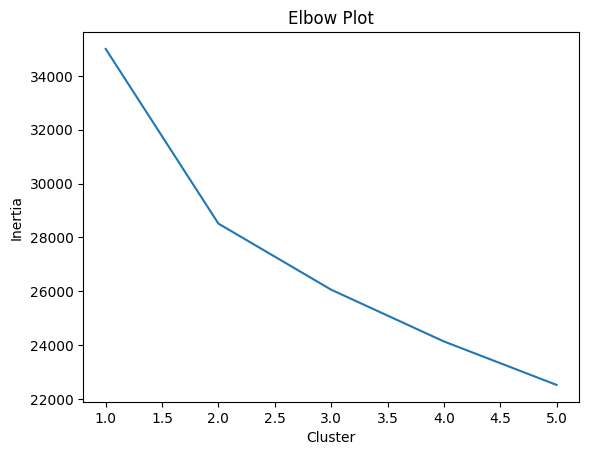

In [217]:
# Create empty list
wcss=[]
# Loop over range to obtain best cluster number
for k in range(1,6):
    kmeans = KMeans(n_clusters = k, random_state = 42, init='k-means++')
    kmeans.fit(num_var) # Fit features to model

    wcss_ = kmeans.inertia_
    wcss.append(wcss_)
plt.plot(range(1,6),wcss) # Plot Elbow Line
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot')

Fit Data into Clusters

In [224]:
# Create an instance of K-mean 
kmeans = KMeans(n_clusters =2, random_state = 42)
kmeans.fit(num_var) # Fit the model

# Predict cluster label
cluster_pred = kmeans.predict(num_var)

C:\Users\Rotim\Tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering Model Evaluation

In [225]:
# Obtain DB_Score and S_Score
db_score = davies_bouldin_score(num_var, cluster_pred)
s_score = silhouette_score(num_var, cluster_pred)

# Print DB_Score and S_Score
print(f" Davies-Bouldin Index: {db_score:.3f}, Silhouette Score: {s_score:.3f}")

 Davies-Bouldin Index: 2.041, Silhouette Score: 0.169


Text(0.5, 1.0, 'K-Mean Cluster')

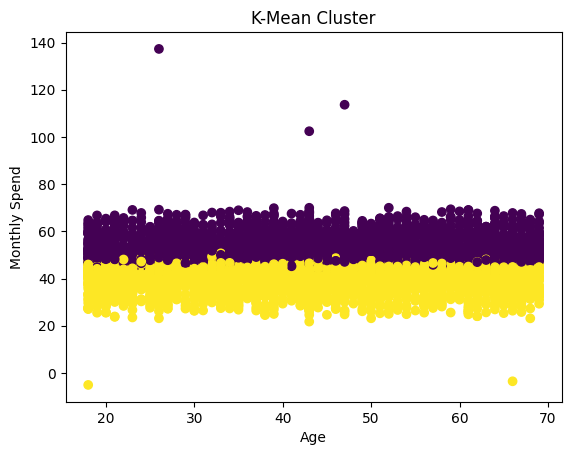

In [226]:
# Plot Scattered plot of Age against Monthly Spending Showing Different Clusters
plt.scatter(streaming_data['Age'],streaming_data['Monthly_Spend'], c=cluster_pred)
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.title('K-Mean Cluster') # Apply title

Assess Individual Variable Performance

In [182]:
# Get contribution of each feature
pca_components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=num_va.columns[:])
pca_components['Magnitude'] = (pca_components['PC1']**2 + pca_components['PC2']**2)**0.5

pca_components[['Magnitude']] # Show performance table


,Magnitude
Age,0.604495
Subscription_Length,0.444068
Support_Tickets_Raised,0.235022
Satisfaction_Score,0.542768
Discount_Offered,0.598434
Last_Activity,0.480366
Monthly_Spend,0.706174


### TASK 1H

Compare the k-Means clustering results from part (g) with another clustering algorithm 
(e.g., Hierarchical Clustering or DBSCAN). Which algorithm provides the best segmentation 
of customer behaviour, and why? Use evaluation metrics to justify your answer. 

Hierarchical Agglomerative Clustering Model

In [196]:
# Create the agglomerative model
agg_cluster = AgglomerativeClustering(n_clusters=40)

# Fit the model
agg_cluster.fit(num_var)

# Obtain the labels
labels = agg_cluster.labels_

# Compute metrics
silhouette_avg = silhouette_score(num_var, labels)
davies_bouldin = davies_bouldin_score(num_var, labels)

# Print Metrics
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.06111886110555561
Davies-Bouldin Index: 1.7672602723945956


In [229]:
# Compile K-means and Agglomerative 
df= pd.DataFrame()
df['Model']=['K-Mean','Agglomerative']
df['Silhouette Score']=[s_score,silhouette_avg]
df['Davies-Bouldin Index']=[davies_bouldin, db_score]
df

,Model,Silhouette Score,Davies-Bouldin Index
0,K-Mean,0.169045,1.76726
1,Agglomerative,0.061119,2.04073
